<center>
<h1> SOLUCIÓN TAREA 3</h1>
<h3>Diego Godoy Rojas & Luis Carlos Diaz </h3>
</center>


Empezamos cargando la imagen junto con las librerias que se van utilizar:

In [1]:
#IMPORTAR LIBRERIAS
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

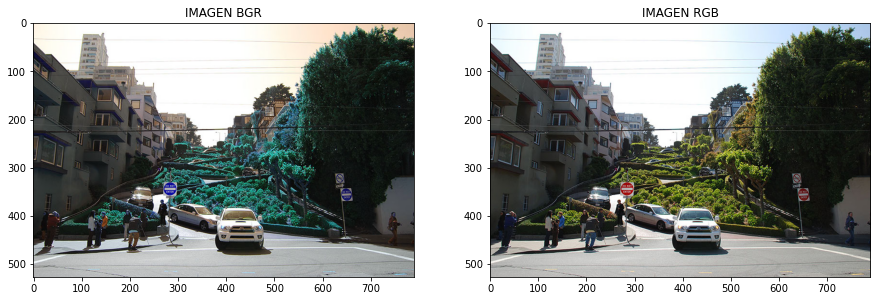

In [183]:
#CARGAR LA IMAGEN
img = cv2.imread('fig/img1.jpg')
#HACEMOS EL CAMBIO DE BGR A RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#VISUALIZAR LA IMAGEN
plt.figure(1,figsize=[15,15])
plt.subplot(121).imshow(img)
plt.title("IMAGEN BGR")
plt.subplot(122).imshow(img_rgb)
plt.title("IMAGEN RGB")
plt.show()

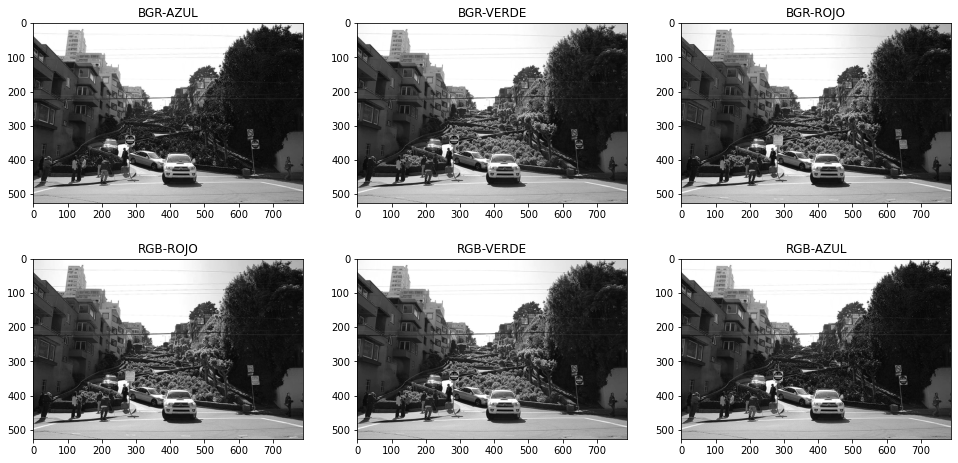

In [182]:
plt.figure(1,figsize=[15,15])
bgr=img
plt.subplot(231).imshow(bgr[:,:,0],cmap='gray')
plt.title("BGR-AZUL")
plt.subplot(232).imshow(bgr[:,:,1],cmap='gray')
plt.title("BGR-VERDE")
plt.subplot(233).imshow(bgr[:,:,2],cmap='gray')
plt.title("BGR-ROJO")
plt.subplot(234).imshow(img_rgb[:,:,0],cmap='gray')
plt.title("RGB-ROJO")
plt.subplot(235).imshow(img_rgb[:,:,1],cmap='gray')
plt.title("RGB-VERDE")
plt.subplot(236).imshow(img_rgb[:,:,2],cmap='gray')
plt.title("RGB-AZUL")
plt.subplots_adjust(top=0.95, bottom=0.55, left=0.10, right=0.95)
plt.show()

Como podemos ver para pasar de BRG a RGB se realizo el cambio en el orden de las matrices de color.

<h1>PRIMER PUNTO</h1>
    
Se estudiaran los diferentes espacios de color que tiene la libreria de OpenCV junto con otros espacios de color logrados en python, el analisis se realizara a partir de imagenes que pueden ser empleadas en los objetivos de nuestro proyecto:

<h2>Espacio de color CMY</h2>

Aqui podemos observar los componentes de color como complementos del rojo, azul y verde, los cuales nos produciran cian, magenta y amarillo a partir de la siguiente relación:
$$
\begin{bmatrix}
C\\ 
M\\ 
Y
\end{bmatrix}=
\begin{bmatrix}
1\\ 
1\\ 
1
\end{bmatrix}-
\begin{bmatrix}
R\\ 
G\\ 
B
\end{bmatrix}
$$

In [184]:
#ESCRIBIMOS UNA FUNCION QUE NOS PERMITA PASAR DEL ESPACIO RGB AL ESPACIO CMY
def rgb_to_cmy(input):
    r=input[:,:,0]
    g=input[:,:,1]
    b=input[:,:,2]
    RGB_SCALE = 255
    CMY_SCALE = 100
    # rgb [0,255] --> cmy [0,1]
    c = 1 - r / RGB_SCALE
    m = 1 - g / RGB_SCALE
    y = 1 - b / RGB_SCALE

    # re-escalamos el rango de valores [0,CMYK_SCALE]
    return c * CMY_SCALE, m * CMY_SCALE, y * CMY_SCALE

In [185]:
img_cmy=rgb_to_cmy(img_rgb)
img_cmy = np.dstack((img_cmy[0],img_cmy[1],img_cmy[2]))

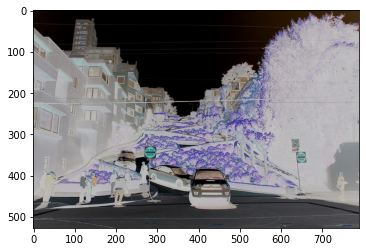

In [186]:
plt.imshow((img_cmy*2).astype(np.uint8))

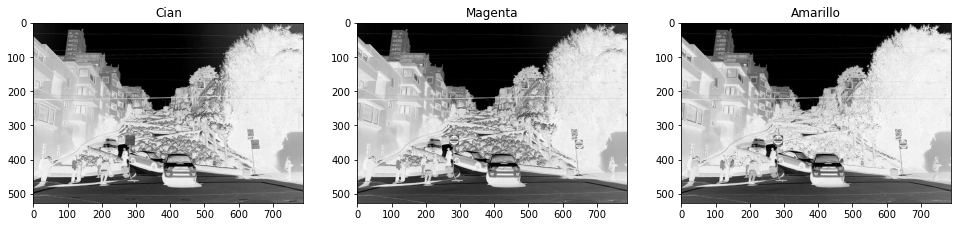

In [188]:
plt.figure(1,figsize=[15,15])

plt.subplot(131).imshow(img_cmy[:,:,0],cmap='gray')
plt.title('Cian')
plt.subplot(132).imshow(img_cmy[:,:,1],cmap='gray')
plt.title('Magenta')
plt.subplot(133).imshow(img_cmy[:,:,2],cmap='gray')
plt.title('Amarillo')

plt.subplots_adjust(top=0.95, bottom=0.6, left=0.10, right=0.95)

<h2>Espacio de color CMYK</h2>

Como el modelo CMY produce un color negro de mala calidad se hace necesario añadir un espacio propio para este color (K), por lo tanto este espacio de color puede ser considerado como uno de 4 dimensiones:

In [189]:
def rgb_to_cmyk(input):
    RGB_SCALE = 255
    CMYK_SCALE = 100
    r=input[:,:,0]
    g=input[:,:,1]
    b=input[:,:,2]
    # rgb [0,255] -> cmy [0,1]
    c = 1 - r / RGB_SCALE
    m = 1 - g / RGB_SCALE
    y = 1 - b / RGB_SCALE
    k = np.zeros((r.shape))
    menor = np.minimum(np.minimum(c,m),y)
    for i in range(menor.shape[0]):
        for j in range(menor.shape[1]):
            #print(y[i,j],menor[i,j])
            if menor[i,j] == 1:
                c[i,j] = 0
                m[i,j] = 0
                y[i,j] = 0
                k[i,j] = 1
            else:
                c[i,j] = (c[i,j] - menor[i,j]) / (1 - menor[i,j])
                m[i,j] = (m[i,j] - menor[i,j]) / (1 - menor[i,j])
                y[i,j] = (y[i,j] - menor[i,j]) / (1 - menor[i,j])
                k[i,j] = menor[i,j]
    # reescalamos [0,CMYK_SCALE]
    return c * CMYK_SCALE, m * CMYK_SCALE, y * CMYK_SCALE, k * CMYK_SCALE

img_cmyk=rgb_to_cmyk(img_rgb)

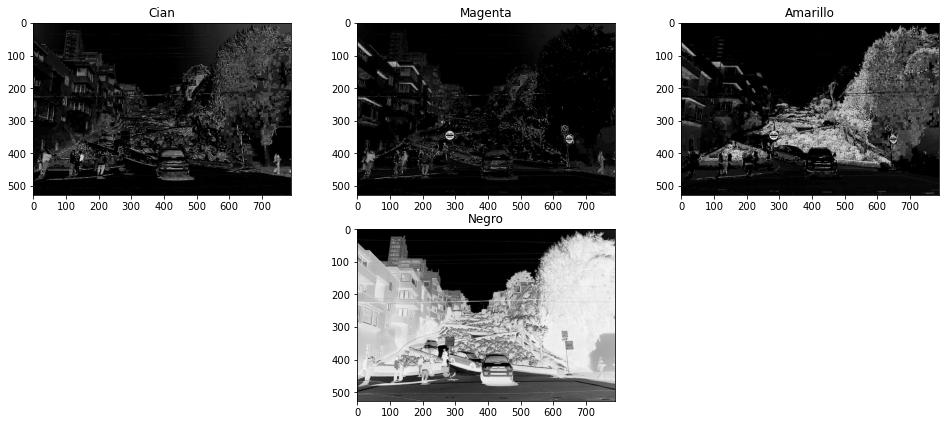

In [190]:
plt.figure(1,figsize=[15,15])
plt.subplot(231).imshow(img_cmyk[0],cmap='gray')
plt.title('Cian')
plt.subplot(232).imshow(img_cmyk[1],cmap='gray')
plt.title('Magenta')
plt.subplot(233).imshow(img_cmyk[2],cmap='gray')
plt.title('Amarillo')
plt.subplot(235).imshow(img_cmyk[3],cmap='gray')
plt.title('Negro')
plt.subplots_adjust(top=0.95, bottom=0.6, left=0.10, right=0.95)
plt.show()

<h2>Espacio de color HSV</h2>

En este espacio la segmentación correspondera al desacople entre el componente de intensidad de los componentes correspondientes a la información que porta el color, el tono y la saturación: 

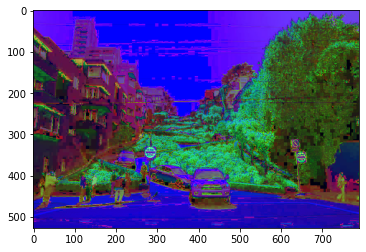

In [191]:
plt.figure(1)
img_hsv=cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv)

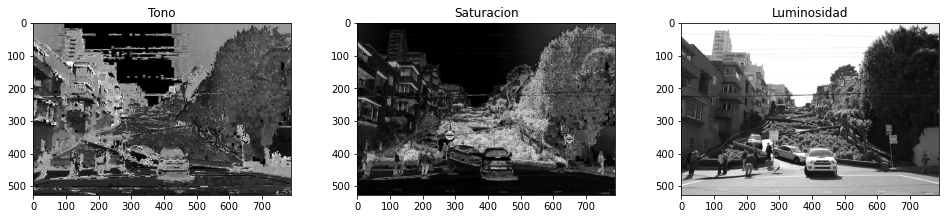

In [192]:
plt.figure(1,figsize=[15,15])

plt.subplot(234).imshow(img_hsv[:,:,0],cmap='gray')
plt.title('Tono')
plt.subplot(235).imshow(img_hsv[:,:,1],cmap='gray')
plt.title('Saturacion')
plt.subplot(236).imshow(img_hsv[:,:,2],cmap='gray')
plt.title('Luminosidad')
plt.subplots_adjust(top=0.95, bottom=0.6, left=0.10, right=0.95)
plt.show()

<h2>Espacio de color HSL</h2>

Este modelo tambien desacopla el componente de intensidad de los componentes correspondientes a la información que porta el color: 

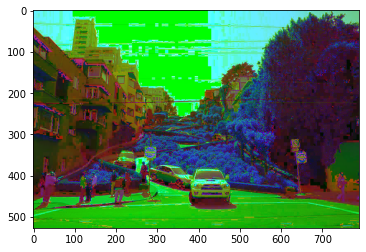

In [193]:
plt.figure(1)
img_hls=cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HLS)
plt.imshow(img_hls)

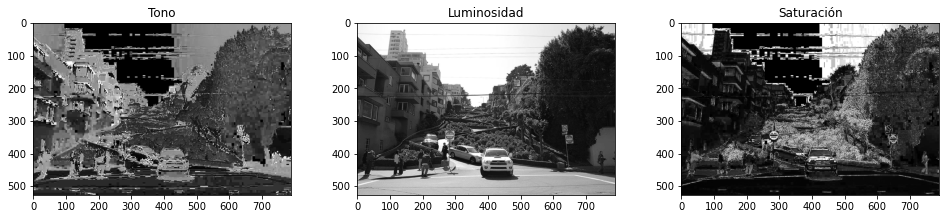

In [194]:
plt.figure(1,figsize=[15,15])
plt.subplot(234).imshow(img_hls[:,:,0],cmap='gray')
plt.title('Tono')
plt.subplot(235).imshow(img_hls[:,:,1],cmap='gray')
plt.title('Luminosidad')
plt.subplot(236).imshow(img_hls[:,:,2],cmap='gray')
plt.title('Saturación')
plt.subplots_adjust(top=0.95, bottom=0.6, left=0.10, right=0.95)

Una de las diferencias entre los dos modelos expuestos anteriormente recae sobre el componente de saturación, pues en el modelo HSL va de color totalmente saturado al gris equivalente, mientras que en el modelo HSV la satuacion si puede llegar al blanco.

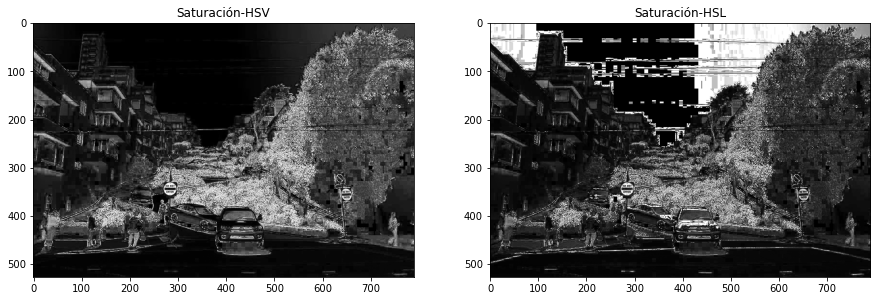

In [197]:
plt.figure(1,figsize=[15,15])
plt.subplot(121).imshow(img_hsv[:,:,1],cmap='gray')
plt.title('Saturación-HSV')
plt.subplot(122).imshow(img_hls[:,:,2],cmap='gray')
plt.title('Saturación-HSL')
plt.show()

<h2>Espacio de color XYZ</h2>

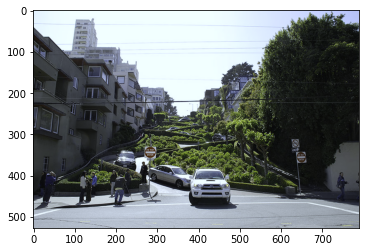

In [198]:
plt.figure(1)
img_xyz=cv2.cvtColor(img_rgb, cv2.COLOR_RGB2XYZ)
plt.imshow(img_xyz)

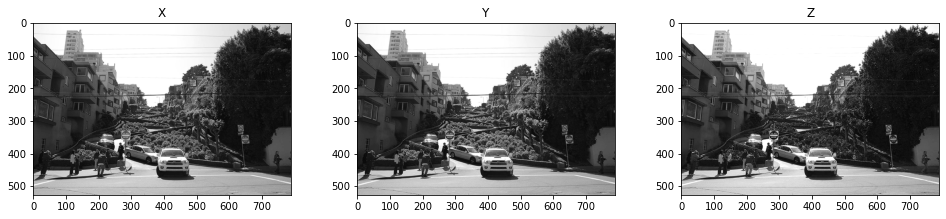

In [199]:
plt.figure(1,figsize=[15,15])
plt.subplot(234).imshow(img_xyz[:,:,0],cmap='gray')
plt.title('X')
plt.subplot(235).imshow(img_xyz[:,:,1],cmap='gray')
plt.title('Y')
plt.subplot(236).imshow(img_xyz[:,:,2],cmap='gray')
plt.title('Z')
plt.subplots_adjust(top=0.95, bottom=0.6, left=0.10, right=0.95)

<h2>Espacio de color LUV</h2>

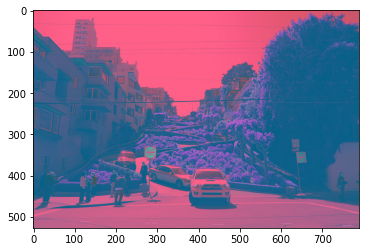

In [200]:
plt.figure(1)
img_luv=cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Luv)
plt.imshow(img_luv)

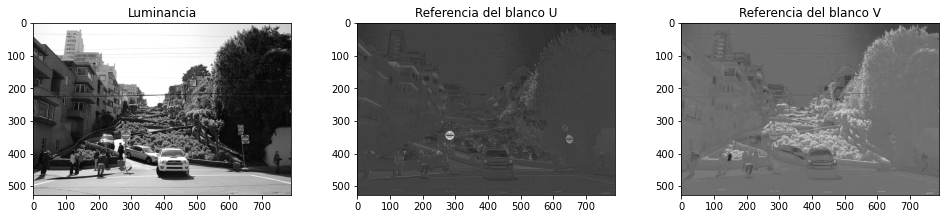

In [201]:
plt.figure(1,figsize=[15,15])
bgr=img
plt.subplot(234).imshow(img_luv[:,:,0],cmap='gray')
plt.title('Luminancia')
plt.subplot(235).imshow(img_luv[:,:,1],cmap='gray')
plt.title('Referencia del blanco U')
plt.subplot(236).imshow(img_luv[:,:,2],cmap='gray')
plt.title('Referencia del blanco V')
plt.subplots_adjust(top=0.95, bottom=0.6, left=0.10, right=0.95)

<h2>Espacio de color LAB </h2>

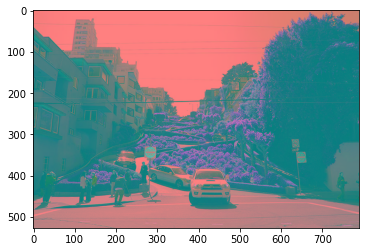

In [202]:
plt.figure(1)
img_lab=cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab)
plt.imshow(img_lab)

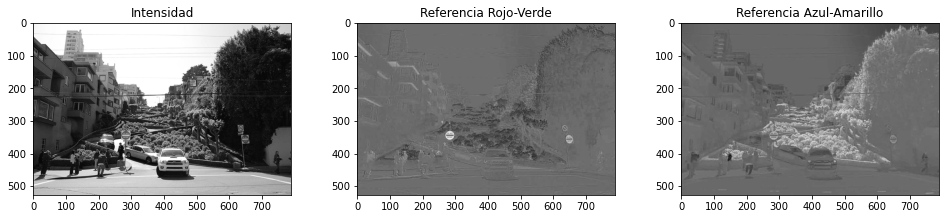

In [203]:
plt.figure(1,figsize=[15,15])
plt.subplot(234).imshow(img_lab[:,:,0],cmap='gray')
plt.title('Intensidad')
plt.subplot(235).imshow(img_lab[:,:,1],cmap='gray')
plt.title('Referencia Rojo-Verde')
plt.subplot(236).imshow(img_lab[:,:,2],cmap='gray')
plt.title('Referencia Azul-Amarillo')
plt.subplots_adjust(top=0.95, bottom=0.6, left=0.10, right=0.95)

<h2>Espacio de color YIQ</h2>

In [204]:
def RGB_to_YIQ(input):
    r=input[:,:,0]
    g=input[:,:,1]
    b=input[:,:,2]
    y=0.299*r+0.587*g+0.114*b
    i=0.596*r-0.275*g-0.321*b
    q=0.212*r-0.523*g+0.311*b
    return y,i,q

In [205]:
img_yiq=RGB_to_YIQ(img_rgb)
img_yiq = np.dstack((img_yiq[0],img_yiq[1],img_yiq[2]))

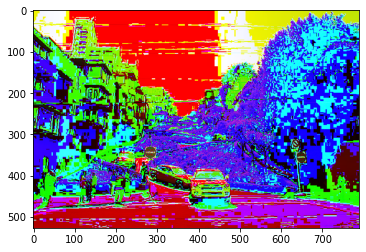

In [206]:
plt.imshow((img_yiq).astype(np.uint8))

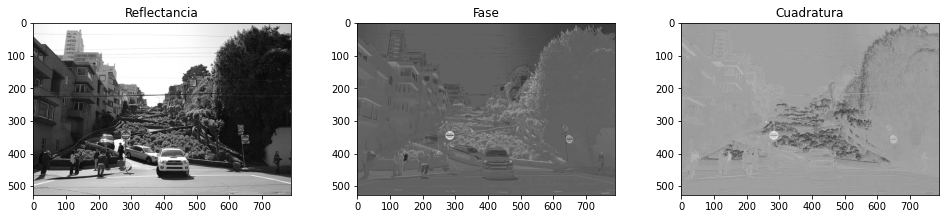

In [207]:
plt.figure(1,figsize=[15,15])
plt.subplot(234).imshow(img_yiq[:,:,0],cmap='gray')
plt.title('Reflectancia')
plt.subplot(235).imshow(img_yiq[:,:,1],cmap='gray')
plt.title('Fase')
plt.subplot(236).imshow(img_yiq[:,:,2],cmap='gray')
plt.title('Cuadratura')
plt.subplots_adjust(top=0.95, bottom=0.6, left=0.10, right=0.95)

<h2>Espacio de color YUV</h2>

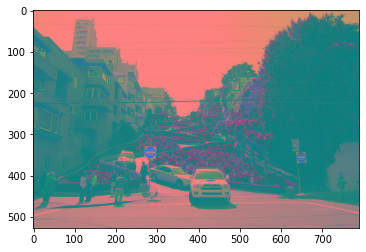

In [208]:
plt.figure(1)
img_YUV=cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)
plt.imshow(img_YUV)

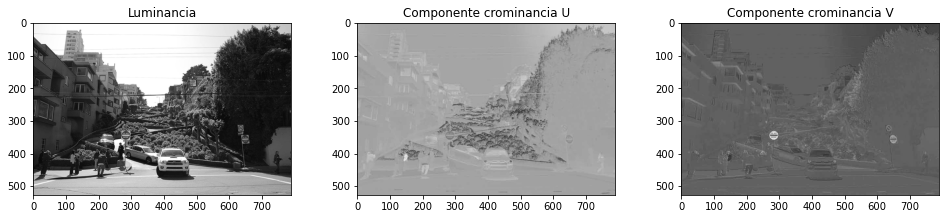

In [209]:
plt.figure(1,figsize=[15,15])
plt.subplot(234).imshow(img_YUV[:,:,0],cmap='gray')
plt.title('Luminancia')
plt.subplot(235).imshow(img_YUV[:,:,1],cmap='gray')
plt.title('Componente crominancia U')
plt.subplot(236).imshow(img_YUV[:,:,2],cmap='gray')
plt.title('Componente crominancia V')
plt.subplots_adjust(top=0.95, bottom=0.6, left=0.10, right=0.95)

<h2>Espacio de color YCbCr</h2>

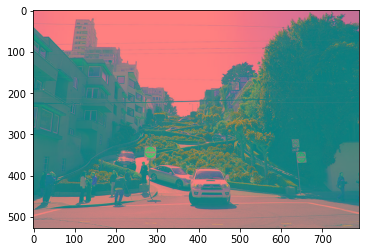

In [210]:
plt.figure(1)
img_YCrCb=cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)
plt.imshow(img_YCrCb)

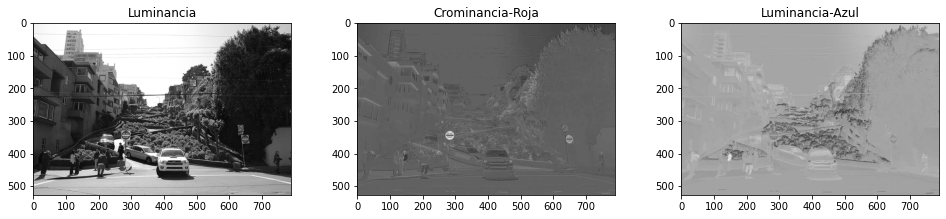

In [211]:
plt.figure(1,figsize=[15,15])
plt.subplot(234).imshow(img_YCrCb[:,:,0],cmap='gray')
plt.title('Luminancia')
plt.subplot(235).imshow(img_YCrCb[:,:,1],cmap='gray')
plt.title('Crominancia-Roja')
plt.subplot(236).imshow(img_YCrCb[:,:,2],cmap='gray')
plt.title('Luminancia-Azul')
plt.subplots_adjust(top=0.95, bottom=0.6, left=0.10, right=0.95)

Muchos de los espacios de color vistos anteriormente nos serviran para realizar procesos de transformación en pseudocolor y color, como tambien la facilidad para trabajar sobre las imagenes a partir de un solo espacio como el caso de HSI en vez de los tres espacios como seria para el caso de RGB o CMY(K), adicional se puede lograr la obtención de un algoritmo para realizar la constancia de color en un imagen a partir de la estimación de la iluminación de esta misma.

<h1>SEGUNDO PUNTO</h1>

Seguiremos estudiando los espacios de color pero en esta ocasión implementaremos tanto la conversión como la conversión inversa para retornar al espacio de color original RGB:

<h2>Espacio de color OHTA</h2>

Este espacio de color es usado en tecnicas de segmentación de imagenes, una de las aplicaciones donde tiene cabida el uso de este espacio de color es en la industria agricola para la segmentacion de productos como veremos a continuación:

In [112]:
def rgb_to_OHTA(input):
    r=input[:,:,0]/255
    g=input[:,:,1]/255
    b=input[:,:,2]/255
    i_1 = (r+g+b)*1/3
    i_2 = (r-b)*1/2
    i_3 = (2*g-r-b)*1/4

    return i_1*255,i_2*255,i_3*255

img_2 = cv2.imread('fig/img_ohta1.jpg')
#HACEMOS EL CAMBIO DE BGR A RGB
img_rgb_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
img_OHTA = rgb_to_OHTA(img_rgb_2)
img_OHTA = np.dstack((img_OHTA[0],img_OHTA[1],img_OHTA[2]))

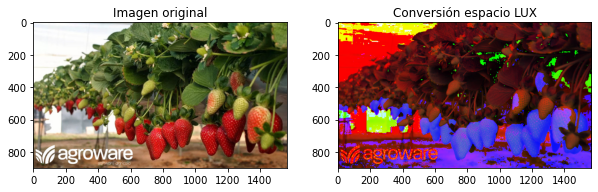

In [115]:
plt.figure(1,figsize=[10,10])
plt.subplot(121).imshow(img_rgb_2)
plt.title('Imagen original')
plt.subplot(122).imshow(img_OHTA.astype(np.uint8))
plt.title('Conversión espacio OHTA')
plt.show()

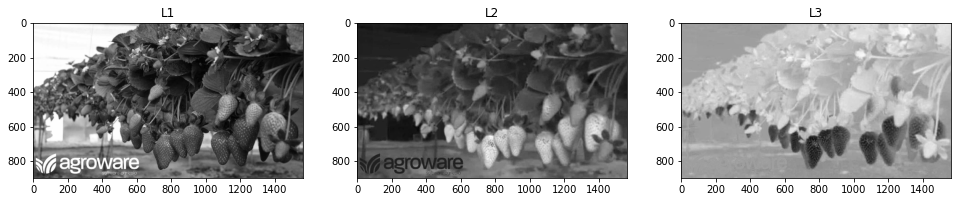

In [110]:
plt.figure(1,figsize=[15,15])
plt.subplot(131).imshow(img_OHTA[:,:,0],cmap='gray')
plt.title('L1')
plt.subplot(132).imshow(img_OHTA[:,:,1],cmap='gray')
plt.title('L2')
plt.subplot(133).imshow(img_OHTA[:,:,2],cmap='gray')
plt.title('L3')
plt.subplots_adjust(top=0.95, bottom=0.6, left=0.10, right=0.95)

Aqui podemos observar como gracias a la transformación del espacio de color pudimos segmentar y de esta manera distinguir unicamente las fresas que alcanzaron un nivel de madurez sobre las demas fresas que aun no lo han logrado.

Asi mismo implementaremos una funcion que nos permita volver al espacio de color RGB:

In [116]:
def OHTA_to_rgb(input):
    i_1=input[:,:,0]
    i_2=input[:,:,1]
    i_3=input[:,:,2]
    r=i_1+i_2-(2/3)*i_3
    g=i_1+(4/3)*i_3
    b=i_1-i_2-(2/3)*i_3
    return r,g,b

In [120]:
img_OHTA_RGB = OHTA_to_rgb(img_OHTA)
img_OHTA_RGB = np.dstack((img_OHTA_RGB[0],img_OHTA_RGB[1],img_OHTA_RGB[2]))

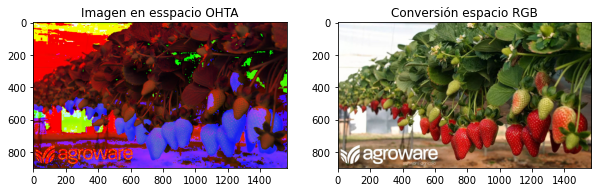

In [119]:
plt.figure(1,figsize=[10,10])
plt.subplot(121).imshow(img_OHTA.astype(np.uint8))
plt.title('Imagen en esspacio OHTA')
plt.subplot(122).imshow(img_OHTA_RGB.astype(np.uint8))
plt.title('Conversión espacio RGB')
plt.show()

<h2>Espacio de color LUX</h2>

Este espacio de color es usado en tecnicas de detección de rostros pues tiene buen desempeño para la detección de piel como veremos a continuación con el rostro del hombre:

In [96]:
#FUNCIÓN PARA CONVERTIR DE RGB A LUX

def rgb_to_LUX(input):
    r=input[:,:,0]
    g=input[:,:,1]
    b=input[:,:,2]
    
    l = ((r+1)**0.3)*((g+1)**0.6)*((b+1)**0.1)-1
    u = np.zeros(l.shape)
    x = np.zeros(l.shape)
    c_1 = r < l
    c_2 = b < l
    
    for i in range(c_1.shape[0]):
        for j in range(c_1.shape[1]):
            if c_1[i,j] == True:
                u[i,j]=(255/2)*((r[i,j]+1)/(l[i,j]+1))
            else:
                u[i,j]=255-(255/2)*((l[i,j]+1)/(r[i,j]+1))
    for i in range(c_2.shape[0]):
        for j in range(c_2.shape[1]):
            if c_2[i,j] == True:
                x[i,j]=(255/2)*((b[i,j]+1)/(l[i,j]+1))
            else:
                x[i,j]=255-(255/2)*((l[i,j]+1)/(b[i,j]+1))
    
    return l,u,x


In [97]:
img_1 = cv2.imread('fig/img_lux.jpg')
#HACEMOS EL CAMBIO DE BGR A RGB
img_rgb_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_LUX   =rgb_to_LUX(img_rgb_1)
img_LUX   = np.dstack((img_LUX[0],img_LUX[1],img_LUX[2]))

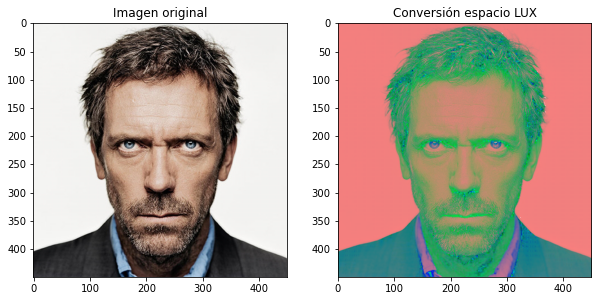

In [98]:
plt.figure(1,figsize=[10,10])
plt.subplot(121).imshow(img_rgb_1)
plt.title('Imagen original')
plt.subplot(122).imshow(img_LUX.astype(np.uint8))
plt.title('Conversión espacio LUX')
plt.show()

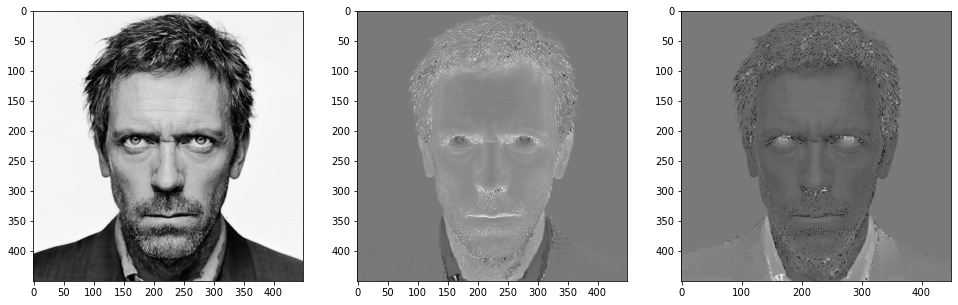

In [69]:
plt.figure(1,figsize=[15,15])
plt.title('Logarithmic hUe eXtension')
plt.subplot(131).imshow(img_LUX[:,:,0],cmap='gray')
plt.subplot(132).imshow(img_LUX[:,:,1],cmap='gray')
plt.subplot(133).imshow(img_LUX[:,:,2],cmap='gray')
plt.subplots_adjust(top=0.95, bottom=0.6, left=0.10, right=0.95)

Una vez convertida la imagen al espacio de color LUX y segmentada se revelan las zonas de tonalidad correspondientes a la cara, distinguiéndose claramente del fondo y la ropa. 

Por ultimo implementaremos una funcion que nos permita volver al espacio de color RGB:

In [52]:
#FUNCIÓN PARA CONVERTIR DE LUX A RGB

def LUX_to_RGB(input):
    l=input[:,:,0]
    u=input[:,:,1]
    x=input[:,:,2]
    r = np.zeros(l.shape)
    g = np.zeros(l.shape)
    b = np.zeros(l.shape)
    M = 256
    for i in range(l.shape[0]):
        for j in range(l.shape[1]):
            r[i,j]=((2*u[i,j])/M)*(l[i,j]+1)-1
            b[i,j]=((2*x[i,j])/M)*(l[i,j]+1)-1
            if r[i,j]>l[i,j]:
                r[i,j]=((-M*(l[i,j]+1))/(2*(u[i,j]-M)))-1
            if b[i,j]>l[i,j]:
                b[i,j]=((-M*(l[i,j]+1))/(2*(x[i,j]-M)))-1
    for i in range(l.shape[0]):
        for j in range(l.shape[1]):
            p_1=(l[i,j]+1)**1.66
            p_2=(r[i,j]+1)**0.5
            p_3=(b[i,j]+1)**0.16
            if p_2*p_3==0:
                g[i,j]=255
            else:
                g[i,j]=(p_1/(p_2*p_3))-1
            #g[i,j]=-1+((l[i,j]+1)/(((r[i,j]+1)**0.3)*((b[i,j]+1)**0.6)))**(1.66)
    return r,g,b

In [53]:
img_LUX_RGB=LUX_to_RGB(img_LUX)
img_LUX_RGB= np.dstack((img_LUX_RGB[0],img_LUX_RGB[1],img_LUX_RGB[2]))

Text(0.5, 1.0, 'Conversión a espacio RGB')

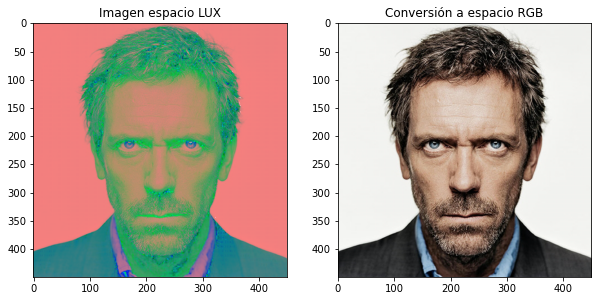

In [72]:
plt.figure(1,figsize=[10,10])
plt.subplot(121).imshow(img_LUX.astype(np.uint8))
plt.title('Imagen espacio LUX')
plt.subplot(122).imshow(img_LUX_RGB.astype(np.uint8))
plt.title('Conversión a espacio RGB')